In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_data.csv')

# Check the first few rows of the dataset
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TotalCharges
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,29.85
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,1889.50
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,True,108.15
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1840.75
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,True,False,True,False,True,151.65


Feature Scaling

In [2]:
from sklearn.preprocessing import StandardScaler

# Define X (features) and y (target variable)
X = df.drop(columns=['Churn_Yes'])  # Dropping the target variable and customerID column
y = df['Churn_Yes']  # Target variable 'Churn'

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical features only
X_scaled = X.copy()  # Create a copy of the features
X_scaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Check the scaled data
X_scaled.head()



,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges
0,0,-1.277445,-1.160323,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,-0.994971
1,0,0.066327,-0.259629,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,-0.173876
2,0,-1.236724,-0.362660,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,-0.960399
3,0,0.514251,-0.746535,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,-0.195400
4,0,-1.236724,0.197365,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,-0.941193


In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your cleaned dataset and 'y' contains the target variable
X = df.drop(columns=['Churn_Yes'])  # Features (X)
y = df['Churn_Yes']  # Target variable (y)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.preprocessing import StandardScaler

# Assuming df contains the cleaned data and X_train, y_train are defined
scaler = StandardScaler()

# Scale numerical features in X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Logistic Regression

Logistic Regression Accuracy: 0.8204400283889283
Logistic Regression Precision: 0.6851851851851852
Logistic Regression Recall: 0.5951742627345844
Logistic Regression F1-Score: 0.6370157819225251


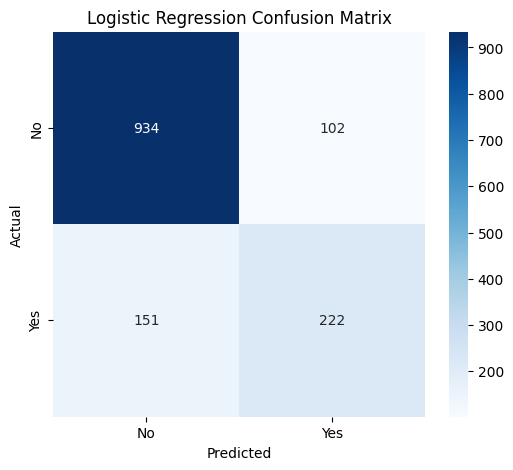

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model
log_model.fit(X_train_scaled, y_train)

# Predict on the test data
log_pred = log_model.predict(X_test_scaled)

# Evaluate the model using Accuracy, Precision, Recall, and F1-Score
log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Logistic Regression Precision: {log_precision}")
print(f"Logistic Regression Recall: {log_recall}")
print(f"Logistic Regression F1-Score: {log_f1}")

# Confusion Matrix
log_cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Train Random Forest

Random Forest Accuracy: 0.7920511000709723
Random Forest Precision: 0.644927536231884
Random Forest Recall: 0.4772117962466488
Random Forest F1-Score: 0.5485362095531587


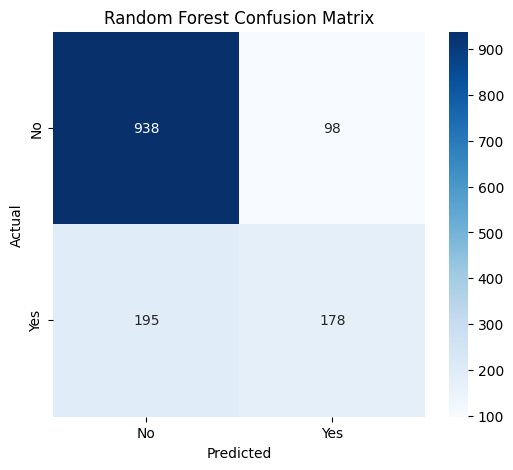

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the model using Accuracy, Precision, Recall, and F1-Score
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Random Forest F1-Score: {rf_f1}")

# Confusion Matrix
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




In [ ]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.5-py3-none-win_amd64.whl (56.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Training: XGBoost

C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [15:23:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.794889992902768
XGBoost Precision: 0.6409395973154363
XGBoost Recall: 0.5120643431635389
XGBoost F1-Score: 0.5692995529061102


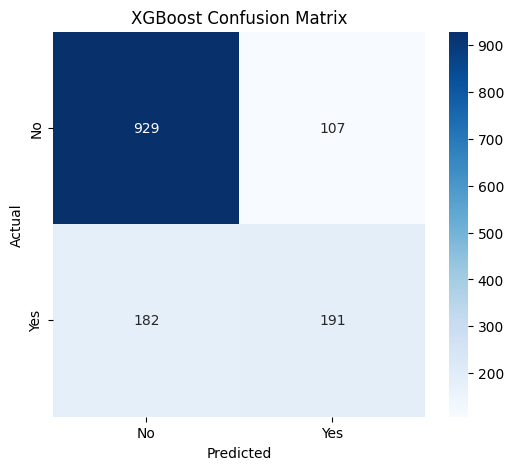

In [31]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model using Accuracy, Precision, Recall, and F1-Score
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Precision: {xgb_precision}")
print(f"XGBoost Recall: {xgb_recall}")
print(f"XGBoost F1-Score: {xgb_f1}")

# Confusion Matrix
# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Comparison of Models

In [32]:
# Comparison of models
print(f"Logistic Regression F1-Score: {log_f1}")
print(f"Random Forest F1-Score: {rf_f1}")
print(f"XGBoost F1-Score: {xgb_f1}")

if log_f1 > rf_f1 and log_f1 > xgb_f1:
    print("Logistic Regression performs best.")
elif rf_f1 > log_f1 and rf_f1 > xgb_f1:
    print("Random Forest performs best.")
else:
    print("XGBoost performs best.")


Logistic Regression F1-Score: 0.6370157819225251
Random Forest F1-Score: 0.5485362095531587
XGBoost F1-Score: 0.5692995529061102
Logistic Regression performs best.


Logistic Regression performed the best for this business problem. It achieved the highest F1-score, which means it was able to make better predictions, balancing both precision and recall. This model is simple, fast, and effective for predicting whether customers will churn, making it the best choice for GlobalMart.
